In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='Malgun Gothic')

In [2]:
df = pd.read_csv('C:\\Users\\DMC CONET\\Documents\\python\\project1\\data\\종합데이터.csv', index_col = 0)

In [3]:
df.columns

Index(['기준년월', '대표자성별명', '대표자연령대명', '설립년도', '사업지역명', '사업업종코드', '사업업종명',
       '종업원수구분명', '재무기준년도', '자본금액', '매출금액', '영업이익', '당기순이익', '자산총합계금액',
       '부채총합계금액', '보증잔액', '운전자금대출여부', '시설자금대출여부', '예금평잔', '대출평잔', '신용평가등급명'],
      dtype='object')

In [4]:
df.describe()

,기준년월,설립년도,사업업종코드,재무기준년도,자본금액,매출금액,영업이익,당기순이익,자산총합계금액,부채총합계금액,보증잔액,예금평잔,대출평잔
count,4464.0,4464.000000,4464.000000,4464.000000,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03
mean,202208.0,2012.945789,46.866039,2020.417787,8.823320e+07,7.737377e+08,5.006183e+07,4.552375e+07,3.538914e+08,2.169214e+08,6.960618e+07,4.936828e+06,7.779547e+07
std,0.0,6.489221,8.193436,0.955406,6.433402e+07,3.482221e+08,3.585087e+07,3.264066e+07,2.814946e+08,1.941926e+08,3.483926e+07,6.432785e+06,4.867617e+07
min,202208.0,1982.000000,10.000000,2015.000000,0.000000e+00,0.000000e+00,-2.290000e+08,-3.080000e+08,1.000000e+06,0.000000e+00,3.000000e+06,0.000000e+00,1.000000e+06
25%,202208.0,2010.000000,46.000000,2020.000000,3.300000e+07,4.260000e+08,2.200000e+07,2.500000e+07,1.150000e+08,5.000000e+07,3.400000e+07,0.000000e+00,3.000000e+07
50%,202208.0,2016.000000,46.000000,2021.000000,8.500000e+07,8.850000e+08,4.800000e+07,4.300000e+07,2.520000e+08,1.520000e+08,9.000000e+07,1.000000e+06,8.000000e+07
75%,202208.0,2018.000000,47.000000,2021.000000,1.380000e+08,1.096000e+09,7.800000e+07,7.900000e+07,5.670000e+08,4.340000e+08,1.010000e+08,8.000000e+06,1.105000e+08
max,202208.0,2020.000000,96.000000,2021.000000,1.810000e+08,1.096000e+09,9.900000e+07,8.600000e+07,8.410000e+08,5.240000e+08,1.010000e+08,1.800000e+07,1.460000e+08


In [5]:
# XGBoost 알고리즘이 지원하는 feature_importance를 통해 추출한 가중치를 바탕으로 계산한 신용점수
df['신용점수'] = ((- 7.22 * df['대출평잔'] +7.03 * df['자산총합계금액'] \
                    - 6.99 * df['부채총합계금액'] + 6.72 * df['영업이익'] \
                    + 6.11 * df['매출금액'] + 5.30 * df['예금평잔']) / 5000000) + 200

<AxesSubplot: xlabel='신용점수', ylabel='Count'>

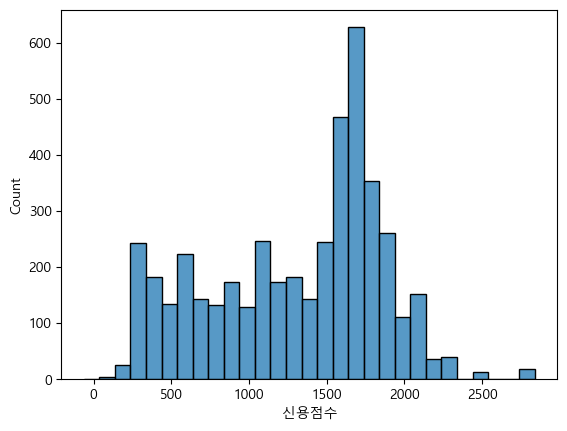

In [6]:
sns.histplot(data = df, x = '신용점수')

In [7]:
# 실제 신용등급 분포와 비슷하도록 조정

In [8]:
std = df['신용점수'].std()
mean = df['신용점수'].mean()

In [9]:
cond1 = mean - 0.8 * std
cond2 = mean + 0.3 * std
cond3 = mean + 0.7 * std
cond4 = mean + 1.25 * std

df.loc[df['신용점수'] <= cond1, '신용등급'] = 'E'
df.loc[(df['신용점수']> cond1) & (df['신용점수'] <= cond2), '신용등급'] = 'D'
df.loc[(df['신용점수']> cond2) & (df['신용점수'] <= cond3), '신용등급'] = 'C'
df.loc[(df['신용점수']> cond3) & (df['신용점수'] <= cond4), '신용등급'] = 'B'
df.loc[df['신용점수'] > cond4, '신용등급'] = 'A'

In [10]:
df['신용등급'].value_counts()

E    1133
C    1124
D    1091
B     807
A     309
Name: 신용등급, dtype: int64

<AxesSubplot: xlabel='신용등급', ylabel='Count'>

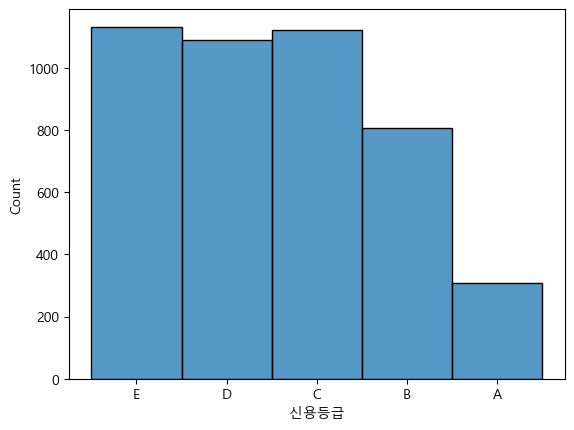

In [11]:
sns.histplot(data = df.sort_values(by = '신용등급', ascending = False), x = '신용등급')

In [12]:
df.to_csv('C:/Users/DMC CONET/Documents/python/project1/data/종합데이터(수정).csv', encoding = 'utf-8-sig')